In [1]:
!pip install web3 pandas requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 580.7/580.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.7/155.7 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.4 MB/s eta 0:00:00a 0:00:01


In [3]:
ETHERSCAN_API_KEY = "YYA4UUR6XZ9W8DTXT39YYEGK7V63UHVUF6"


In [5]:
WALLET_ADDRESS = "0x95222290DD7278Aa3Ddd389Cc1E1d165CC4BAfe5"


In [9]:
import requests
import pandas as pd

# Set your API key and wallet address
ETHERSCAN_API_KEY = "YYA4UUR6XZ9W8DTXT39YYEGK7V63UHVUF6"
WALLET_ADDRESS = "0x95222290DD7278Aa3Ddd389Cc1E1d165CC4BAfe5"

def get_wallet_transactions(wallet_address, api_key):
    url = f"https://api.etherscan.io/api?module=account&action=txlist&address={wallet_address}&startblock=0&endblock=99999999&sort=desc&apikey={api_key}"
    
    response = requests.get(url)
    data = response.json()
    
    if data["status"] == "1":
        return pd.DataFrame(data["result"])
    else:
        print("Error:", data["message"])
        return None

# Fetch transactions
df = get_wallet_transactions(WALLET_ADDRESS, ETHERSCAN_API_KEY)

# Show first 9 rows
df.head()


,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,gasPrice,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,methodId,functionName
0,21780155,1738756847,0xbd5c2cafff02a78bd44879002e6334fb00de292c37c9...,1988494,0x9557f6f0bbf83add5088f5236956071775bd488f0a4c...,217,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0xebec795c9c8bbd61ffc14a6662944748f299cacf,30817169057573891,21055,1308255337,0,1,0x,,22954444,21055,4,0x,
1,21780155,1738756847,0x8b9ee04abc81bc9cd2c9e5dfaded18c817d4954942e9...,1988493,0x9557f6f0bbf83add5088f5236956071775bd488f0a4c...,58,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0x2241e238b5a77f39023911a462d8157237502b58,229251062647453,27329,1308255337,0,1,0x,,12358373,27329,4,0x,
2,21780151,1738756799,0xc58f48206071136a8bae9fa1d21601d67b820630269f...,1988492,0x9af006ade2360dc040089dc43d46f60a7a9633d6b178...,165,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0x388c818ca8b9251b393131c08a736a67ccb19297,10273153251020603,23100,1205866360,0,1,0x,,14265970,22111,8,0x,
3,21780151,1738756799,0xa840e9fb0309d0814b136da01e1cf66432f391127e1d...,1988491,0x9af006ade2360dc040089dc43d46f60a7a9633d6b178...,130,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0x2241e238b5a77f39023911a462d8157237502b58,64672633985464,27951,1205866360,0,1,0x,,10805433,27329,8,0x,
4,21780151,1738756799,0x3295cc1a57e8e51f2de1c6493b96fb0c1789097ef741...,1988490,0x9af006ade2360dc040089dc43d46f60a7a9633d6b178...,93,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0x2241e238b5a77f39023911a462d8157237502b58,1501582981235859,27951,1205866360,0,1,0x,,7828027,27329,8,0x,


In [11]:
df[["hash", "from", "to", "value", "timeStamp"]].head()

,hash,from,to,value,timeStamp
0,0xbd5c2cafff02a78bd44879002e6334fb00de292c37c9...,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0xebec795c9c8bbd61ffc14a6662944748f299cacf,30817169057573891,1738756847
1,0x8b9ee04abc81bc9cd2c9e5dfaded18c817d4954942e9...,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0x2241e238b5a77f39023911a462d8157237502b58,229251062647453,1738756847
2,0xc58f48206071136a8bae9fa1d21601d67b820630269f...,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0x388c818ca8b9251b393131c08a736a67ccb19297,10273153251020603,1738756799
3,0xa840e9fb0309d0814b136da01e1cf66432f391127e1d...,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0x2241e238b5a77f39023911a462d8157237502b58,64672633985464,1738756799
4,0x3295cc1a57e8e51f2de1c6493b96fb0c1789097ef741...,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0x2241e238b5a77f39023911a462d8157237502b58,1501582981235859,1738756799


In [15]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"], unit="s")
df[["hash", "from", "to", "value", "timeStamp"]].head()

,hash,from,to,value,timeStamp
0,0xbd5c2cafff02a78bd44879002e6334fb00de292c37c9...,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0xebec795c9c8bbd61ffc14a6662944748f299cacf,30817169057573891,2025-02-05 12:00:47
1,0x8b9ee04abc81bc9cd2c9e5dfaded18c817d4954942e9...,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0x2241e238b5a77f39023911a462d8157237502b58,229251062647453,2025-02-05 12:00:47
2,0xc58f48206071136a8bae9fa1d21601d67b820630269f...,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0x388c818ca8b9251b393131c08a736a67ccb19297,10273153251020603,2025-02-05 11:59:59
3,0xa840e9fb0309d0814b136da01e1cf66432f391127e1d...,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0x2241e238b5a77f39023911a462d8157237502b58,64672633985464,2025-02-05 11:59:59
4,0x3295cc1a57e8e51f2de1c6493b96fb0c1789097ef741...,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0x2241e238b5a77f39023911a462d8157237502b58,1501582981235859,2025-02-05 11:59:59


In [17]:
df["value"] = df["value"].astype(float) / 10**18  # Convert from Wei to ETH
total_sent = df[df["from"] == WALLET_ADDRESS]["value"].sum()
total_received = df[df["to"] == WALLET_ADDRESS]["value"].sum()

print(f"Total ETH Sent: {total_sent} ETH")
print(f"Total ETH Received: {total_received} ETH")

Total ETH Sent: 0.0 ETH
Total ETH Received: 0.0 ETH


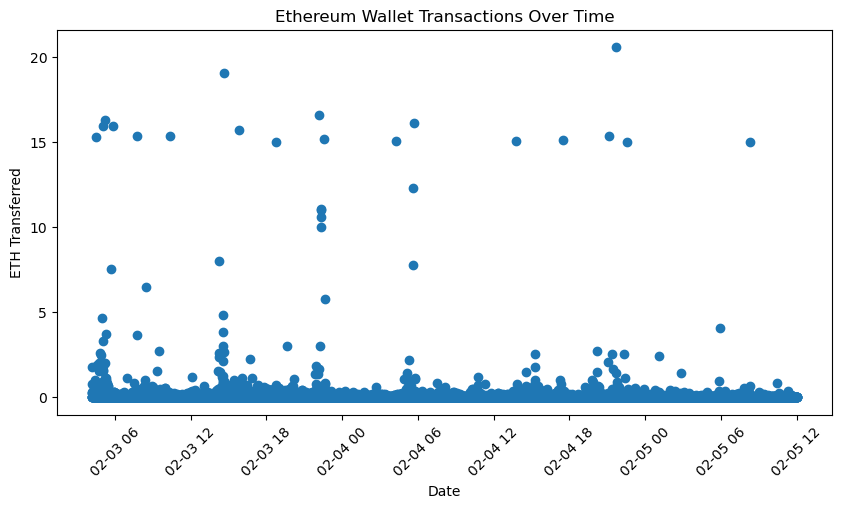

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["timeStamp"], df["value"], marker="o", linestyle="None")
plt.xlabel("Date")
plt.ylabel("ETH Transferred")
plt.title("Ethereum Wallet Transactions Over Time")
plt.xticks(rotation=45)
plt.show()